#O poder da Analise Exploratoria
<center> <img src = "https://advancedinstitute.ai/wp-content/uploads/2019/04/analise_dados-1170x500.png" width=1000>

## Onde nos estamos?

<center><img src='https://upload.wikimedia.org/wikipedia/commons/b/b9/CRISP-DM_Process_Diagram.png', width = 600>

<center><img src='https://d2908q01vomqb2.cloudfront.net/d435a6cdd786300dff204ee7c2ef942d3e9034e2/2021/01/19/blog18_image001.jpg', width = 600>





#CASE

## Encontrando vinhos de qualidades atraves de Analise e transformações no Dataset
<center><img src='https://smartgirls.com.br/wp-content/uploads/2015/10/vinho.gif', width = 1000>



O objetivo deste problema é prever quais vinhos foram aprovados pelos **enólogos basendo-se apenas em suas propriedades** químicas! Este problema foi adaptado de um famoso dataset no [UCI](https://archive.ics.uci.edu/ml/datasets/wine).
As bases de dados já estão separadas em treino e teste nos arquivos `transf_wine_treino.csv` e `transf_wine_teste.csv`, com as seguintes features:
- `type`: Tipo do vinho (Branco ou Tinto)
- `fixed acidity`: Acidez proveniente de ácidos que não evaporam rapidamente
- `volatile acidity`: Acidez proveniente de ácidos que evaporam rapidamente
- `citric acid`: Ácido cítrico presente no vinho, dá sensação de fescor
- `residual_sugar`: Açúcar da uva residual após fermentação
- `chlorides`: Quantidade de sais presentes no vinho
- `free sulfur dioxide`: Formas livres de SO2 presentes no vinho
- `total sulfur dioxide`: Formas livres e moleculares de SO2 presentes no vinho
- `pH`: pH (acidez) do vinho
- `sulphates`: Quantidade de sulfatos no vinho
- `alcohol`: Quantidade de álcool presente no vinho
- `aprovado`: Indicativo de aprovação ou não do vinho pelos enólogos. `1` indica aprovação e `0` indica reprovação. **É nossa variável de interesse!**

###Importando bibliotecas e Datasets

In [ ]:
# Carregando alguns módulos essenciais para trabalharmos os dados
# Removendo warnings chatos
import warnings
warnings.filterwarnings('ignore')
# Carregando as principais bibliotecas com o 'import'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Algumas opções do Pandas boas para vermos muitas linhas e colunas de uma vez
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

plt.style.use('ggplot')

# Carregando os dados
dados_treino = pd.read_csv('/content/transf_wine_treino.csv',index_col=0).drop('index',axis=1)
dados_teste = pd.read_csv('/content/transf_wine_teste.csv',index_col=0).drop('index',axis=1)

In [ ]:
# Primeiras linhas da base de treino
dados_treino.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,aprovado
0,white,6.7,0.41,0.27,2.6,0.033,25.0,85.0,0.99086,3.05,0.34,11.7,1
1,white,8.6,0.23,0.46,1.0,0.054,9.0,72.0,0.99410,2.95,0.49,9.1,1
2,white,6.6,0.32,0.26,4.6,0.031,26.0,120.0,0.99198,3.40,0.73,12.5,1
3,red,8.2,0.33,0.32,2.8,0.067,4.0,12.0,0.99473,3.30,0.76,12.8,1
4,white,6.9,0.28,0.24,2.1,0.034,49.0,121.0,0.98882,2.98,0.43,13.2,1


###Qual é o nosso target?

In [ ]:
# Selecionando manualmente os aprovados
vinhos_aprovados = dados_treino[dados_treino.aprovado==1]
# Visualizando os dados
vinhos_aprovados.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,aprovado
0,white,6.7,0.41,0.27,2.6,0.033,25.0,85.0,0.99086,3.05,0.34,11.7,1
1,white,8.6,0.23,0.46,1.0,0.054,9.0,72.0,0.99410,2.95,0.49,9.1,1
2,white,6.6,0.32,0.26,4.6,0.031,26.0,120.0,0.99198,3.40,0.73,12.5,1
3,red,8.2,0.33,0.32,2.8,0.067,4.0,12.0,0.99473,3.30,0.76,12.8,1
4,white,6.9,0.28,0.24,2.1,0.034,49.0,121.0,0.98882,2.98,0.43,13.2,1


no mundo real não saberiamos se o vinho é aprovado ou não, para tentarmos predizer se um vinho é ou não aprovado precisamos entender o relacionamento de vinhos aprovados com as demais variaveis.

###EDA (Analise exploratoria)

In [ ]:
dados_treino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3820 entries, 0 to 3819
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3820 non-null   object 
 1   fixed acidity         3812 non-null   float64
 2   volatile acidity      3815 non-null   float64
 3   citric acid           3817 non-null   float64
 4   residual sugar        3819 non-null   float64
 5   chlorides             3818 non-null   float64
 6   free sulfur dioxide   3820 non-null   float64
 7   total sulfur dioxide  3820 non-null   float64
 8   density               3820 non-null   float64
 9   pH                    3813 non-null   float64
 10  sulphates             3816 non-null   float64
 11  alcohol               3820 non-null   float64
 12  aprovado              3820 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 417.8+ KB


In [ ]:
# Aplicando o método describe
dados_treino.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,aprovado
count,3812.000000,3815.000000,3817.000000,3819.000000,3818.000000,3820.000000,3820.000000,3820.000000,3813.000000,3816.000000,3820.000000,3820.000000
mean,7.234824,0.353751,0.315517,5.422427,0.057588,30.224738,115.938482,0.994884,3.215156,0.528305,10.366881,0.495026
std,1.278295,0.170932,0.148611,4.839934,0.035642,18.459657,57.503221,0.002990,0.161158,0.148777,1.166274,0.500041
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.250000,8.000000,0.000000
25%,6.400000,0.240000,0.240000,1.800000,0.039000,16.000000,76.000000,0.992660,3.110000,0.430000,9.400000,0.000000
50%,7.000000,0.300000,0.310000,2.850000,0.048000,28.000000,119.000000,0.995165,3.200000,0.500000,10.100000,0.000000
75%,7.700000,0.430000,0.400000,8.100000,0.069000,41.000000,156.000000,0.997100,3.310000,0.590000,11.100000,1.000000
max,15.900000,1.580000,1.230000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


### Representar as distribuições Graficamente

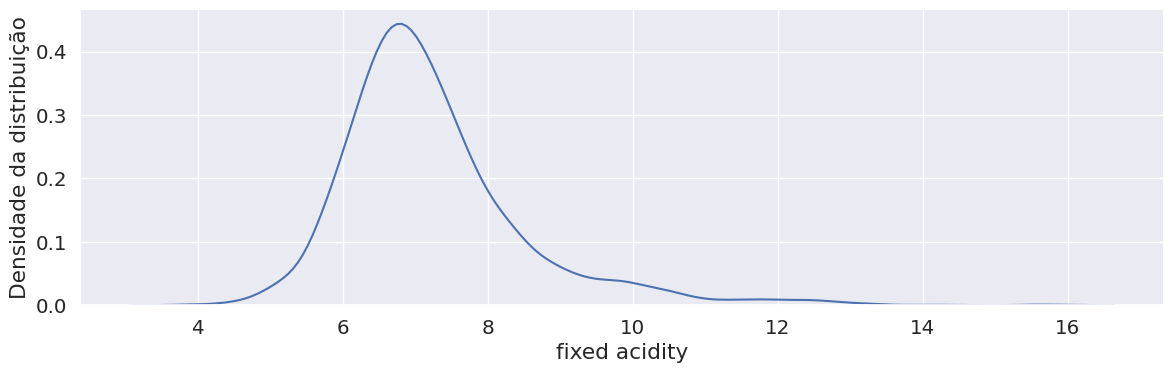

In [ ]:
# Importando o módulo Seaborn
import seaborn as sns
sns.set(font_scale = 1.3) # Para aumentar o tamanho da fonte
coluna = 'fixed acidity' # Coluna a ser representada

# Instanciando o Displot. Só precisamos da coluna que queremos representar
sns.displot(
    dados_treino[coluna], #Dados a serem representados. Selecionamos apenas a coluna de interesse
    height=4, # Altura em polegadas do gráfico
    aspect=3, # Proporção entre largura e altura do gráfico. Números > 1 representam retâgulos mais 'deitados'
    kind='kde' # Distribuição contínua,
)
plt.ylabel('Densidade da distribuição')
plt.show() # Para mostrar o gráfico


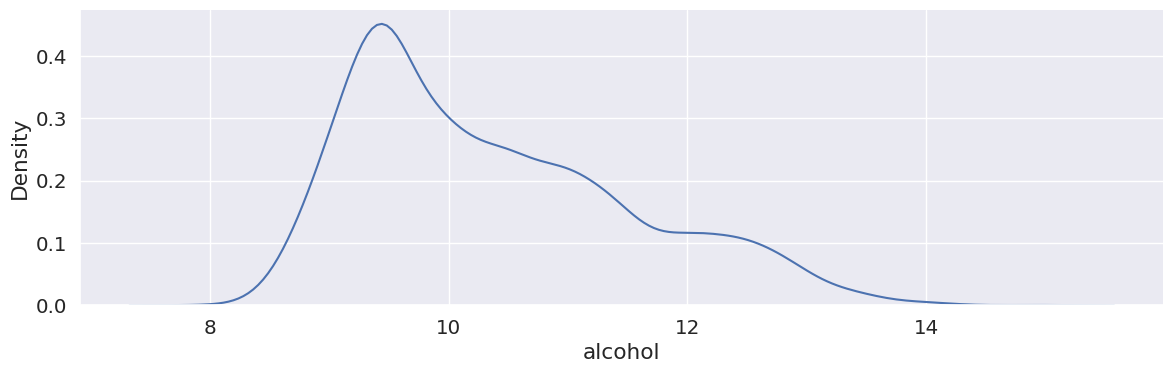

In [ ]:
# Importando o módulo Seaborn
import seaborn as sns
sns.set(font_scale = 1.3) # Para aumentar o tamanho da fonte
coluna = 'alcohol' # Coluna a ser representada

# Instanciando o Displot. Só precisamos da coluna que queremos representar
sns.displot(
    dados_treino[coluna], #Dados a serem representados. Selecionamos apenas a coluna de interesse
    height=4, # Altura em polegadas do gráfico
    aspect=3, # Proporção entre largura e altura do gráfico. Números > 1 representam retâgulos mais 'deitados'
    kind='kde',

)
plt.show()

###E para nossa variavel categorica Type?

Podemos usar o value_counts() no lugar do describe para variaveis Categorica nominal.

In [ ]:
# Selecionando a coluna e contando registros
dados_treino.type.value_counts(normalize=True)

type
white    0.738743
red      0.261257
Name: proportion, dtype: float64

In [ ]:
# Aplicando a mesma contagem para os dados de teste
dados_teste.type.value_counts(normalize=True)

type
white    0.736287
red      0.263713
Name: proportion, dtype: float64

Também podemos representar estas contagens em um `Histograma`, usando o método do dataframe `.hist()`:

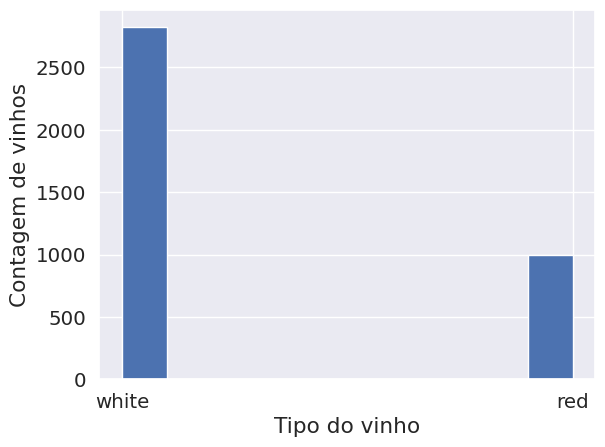

In [ ]:
# Selecionando a coluna 'type' e construindo o histograma
dados_treino.type.hist()
plt.xlabel('Tipo do vinho')
plt.ylabel('Contagem de vinhos')
plt.show()

### Visualizando relações entre variáveis

Agora que temos recursos para analisar uma variável, como representar `relações entre variáveis`?
Neste ponto, iremos abordar alguns tipos mais famosos de gráficos, como os de dispersão e de linha! <p>
Para construir gráficos de `dispersão`, podemos usar a função `plot(kind='scatter')` do Dataframe:

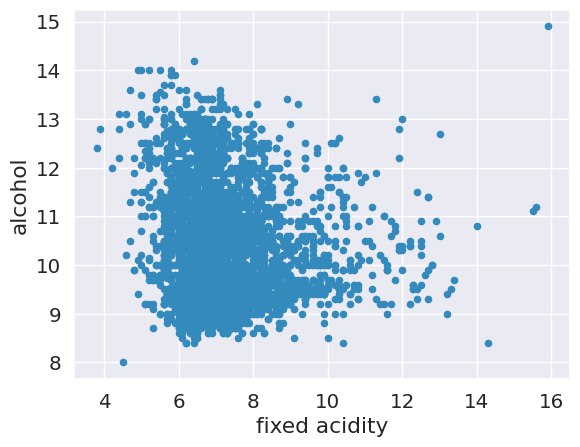

In [ ]:
# Selecionando dados e representando em dispersão
dados_treino.plot(
    x='fixed acidity', # Coluna para o eixo X
    y='alcohol', # Coluna para o eixo Y
    kind='scatter' # Tipo de gráfico. Para dispersão, usamos 'scatter'
)
plt.show()

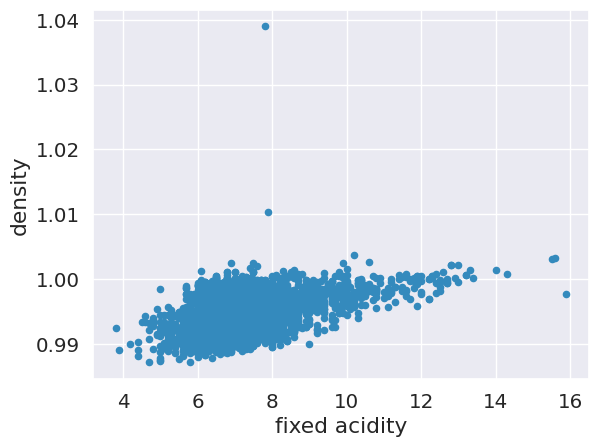

In [ ]:
# Selecionando dados e representando em dispersão
dados_treino.plot(
    x='fixed acidity', # Coluna para o eixo X
    y='density', # Coluna para o eixo Y
    kind='scatter' # Tipo de gráfico. Para dispersão, usamos 'scatter'
)
plt.show()


Podemos inclusive mudar as cores do gráfico, usando para isso alguma outra coluna categórica, como, por exemplo, o tipo de vinho (`type`):

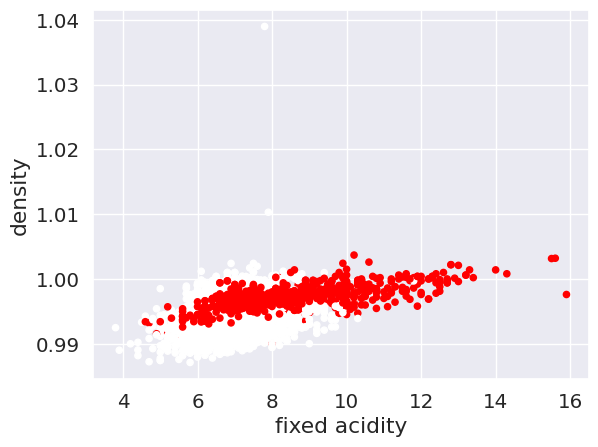

In [ ]:
# Selecionando dados e representando em dispersão
dados_treino.plot(
    x='fixed acidity', # Coluna para o eixo X
    y='density', # Coluna para o eixo Y
    c='type', # Indicando que queremos diferenciar as cores (c) do gráfico pela coluna 'type'
    # alpha=0.5 # Força de transparência dos pontos
    kind='scatter' # Tipo de gráfico. Para dispersão, usamos 'scatter'
)
plt.show()

### Unindo visões

Agora que temos clareza de que tanto os histogramas quanto os gráficos de dispersão são úteis, será que podemos unir tudo em uma visão única?

A resposta é **sim**! Podemos usar mais uma função do Seaborn, o `pairplot()`, para isso:

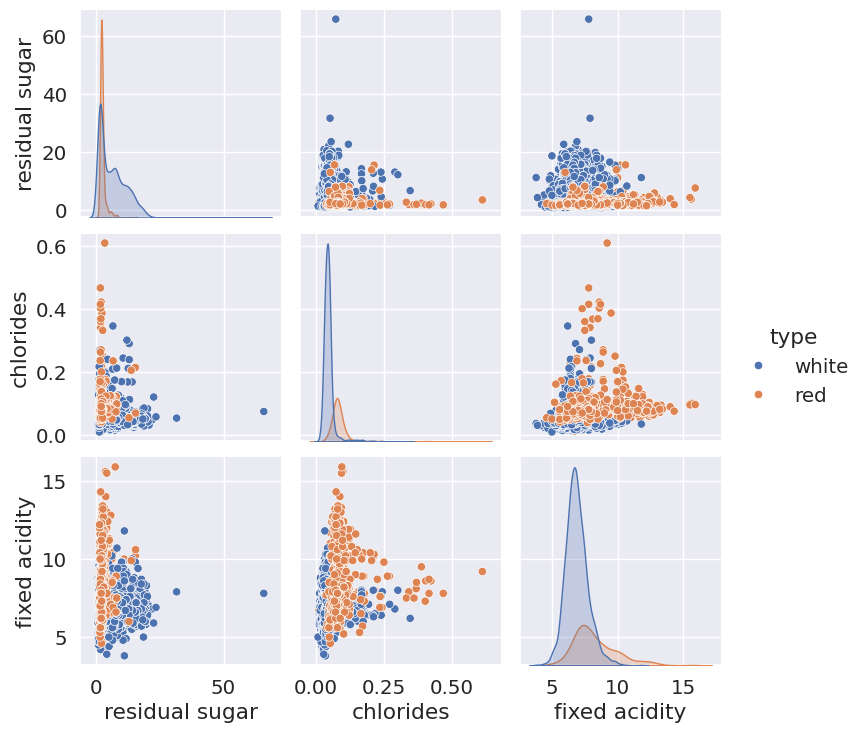

In [ ]:
# Analisando as variáveis Residual Sugar, Chloirides e Free Sulfur Dioxide
sns.set_context(font_scale=0.7)
sns.pairplot(dados_treino, # Dados para plotar
             hue='type', #Cada gráfico separado pelo tipo, nossa variável categórica
            vars=['residual sugar','chlorides','fixed acidity'] # Variáveis a serem analisadas
            )
plt.show()

### Relações entre variáveis

Para identificar correlações, podemos ser mais diretos e usar a **matriz de correlações de Pearson** do DataFrame, `.corr()`

In [ ]:
#copiando o conjunto de dados para aplicar a correlação
dados_treino_corr = dados_treino.copy()

In [ ]:
#removendo a coluna type que não é numerica
dados_treino_corr.drop('type', inplace = True, axis = 1)

In [ ]:
dados_treino_corr.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,aprovado
fixed acidity,1.000000,0.222785,0.309627,-0.115249,0.289936,-0.278518,-0.325076,0.455007,-0.254550,0.289676,-0.102279,-0.075287
volatile acidity,0.222785,1.000000,-0.388123,-0.205602,0.385803,-0.349255,-0.420528,0.278714,0.283761,0.235139,-0.049637,-0.250180
citric acid,0.309627,-0.388123,1.000000,0.175701,0.023442,0.163051,0.237000,0.100831,-0.364916,0.036574,-0.025742,0.069604
residual sugar,-0.115249,-0.205602,0.175701,1.000000,-0.128864,0.413484,0.497286,0.553032,-0.275806,-0.176995,-0.335601,-0.038862
chlorides,0.289936,0.385803,0.023442,-0.128864,1.000000,-0.181222,-0.265867,0.356728,0.037354,0.411112,-0.259419,-0.179230
free sulfur dioxide,-0.278518,-0.349255,0.163051,0.413484,-0.181222,1.000000,0.725463,0.029537,-0.159882,-0.172979,-0.160953,0.042836
total sulfur dioxide,-0.325076,-0.420528,0.237000,0.497286,-0.265867,0.725463,1.000000,0.030814,-0.256720,-0.251869,-0.253002,-0.056357
density,0.455007,0.278714,0.100831,0.553032,0.356728,0.029537,0.030814,1.000000,0.003035,0.266175,-0.669189,-0.278794
pH,-0.254550,0.283761,-0.364916,-0.275806,0.037354,-0.159882,-0.256720,0.003035,1.000000,0.186242,0.141885,0.029202
sulphates,0.289676,0.235139,0.036574,-0.176995,0.411112,-0.172979,-0.251869,0.266175,0.186242,1.000000,-0.009753,0.042009


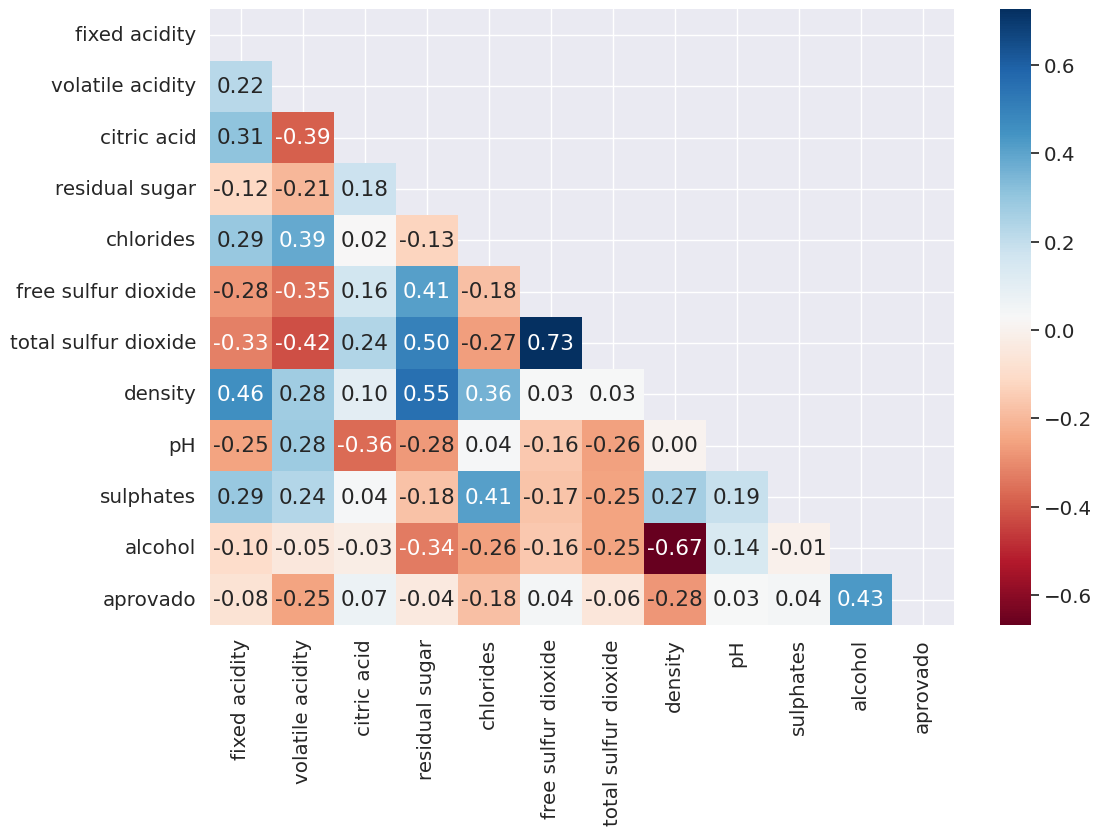

In [ ]:
# Plotando a matriz de correlações usando um Heatmap para dar cor aos números
sns.set_context(font_scale=1.9)
plt.figure(figsize=(12,8))
sns.heatmap(
    dados_treino_corr.corr(), #Fonte dos dados, nossa matriz de correlação
    annot=True, #Anotar os valores das correlações nas caixinhas coloridas
    fmt='.2f', # Formato float de 2 dígitos, para arredondar os números
    cmap='RdBu', # Mapa de cores do vermelho (menor) para o azul (maior)
    mask=np.triu( # Faz uma matriz triangular
        np.ones_like(dados_treino_corr.corr()) # usando como base uma matriz de '1's, do mesmo tamanho que a matriz de correlação
    ) # A máscara vai então 'apagar' a diagonal superior da matriz
           )
plt.show()

### Mais relações com a variável resposta

Nossa variável de interesse é numérica, então podemos construir visões gráficas que relacionem esta informação com outras propriedades de vinhos na base.

Um dos gráficos mais comuns para visualização de dispersão é o `boxplot`, bastante útil comparando variáveis numéricas e categóricas:

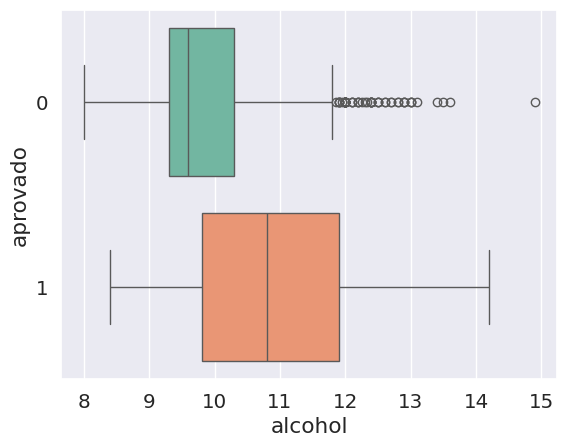

In [ ]:
sns.boxplot(
    data=dados_treino, # Dataframe utilizado
    x='alcohol', # Variável no eixo x
    y='aprovado', # Variável no eixo y
    orient='h', # h -> horizontal, v -> vertical
    palette='Set2'
)
plt.show()

Seria interessante se pudessemos construir `boxplots` de todas as variáveis numéricas! Faremos isso combinando o código anterior com uma estrutura de repetição, o `for`:

In [ ]:
# Listando as colunas numéricas
colunas_numericas = [['fixed acidity','volatile acidity','citric acid','residual sugar'],
                    ['chlorides','free sulfur dioxide','total sulfur dioxide','density'],
                    ['pH','sulphates','alcohol','']] # Essa última célula está vazia pois temos 11 colunas numéricas

Aqui fizemos uma matriz de `3 linhas por 4 colunas`, com cada posição contendo um nome de coluna que queremos plotar (são apenas 11 colunas)

In [ ]:
colunas_numericas

[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar'],
 ['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density'],
 ['pH', 'sulphates', 'alcohol', '']]

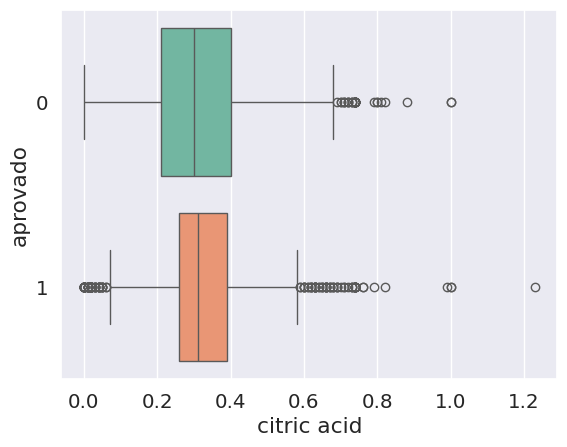

In [ ]:
sns.boxplot(
    data=dados_treino, # Dataframe utilizado
    # Por exemplo, se quisermos plotar o 'citric acid', ele estará na primeira linha (0), terceira coluna (2)
    x=colunas_numericas[0][2],
    y='aprovado', # Variável no eixo y, que será sempre o 'aprovado'
    orient='h', # h -> horizontal, v -> vertical
    palette='Set2'
)
plt.show()

Podemos então repetir o processo para todas as colunas, usando uma estrutura de repetição ou `for`

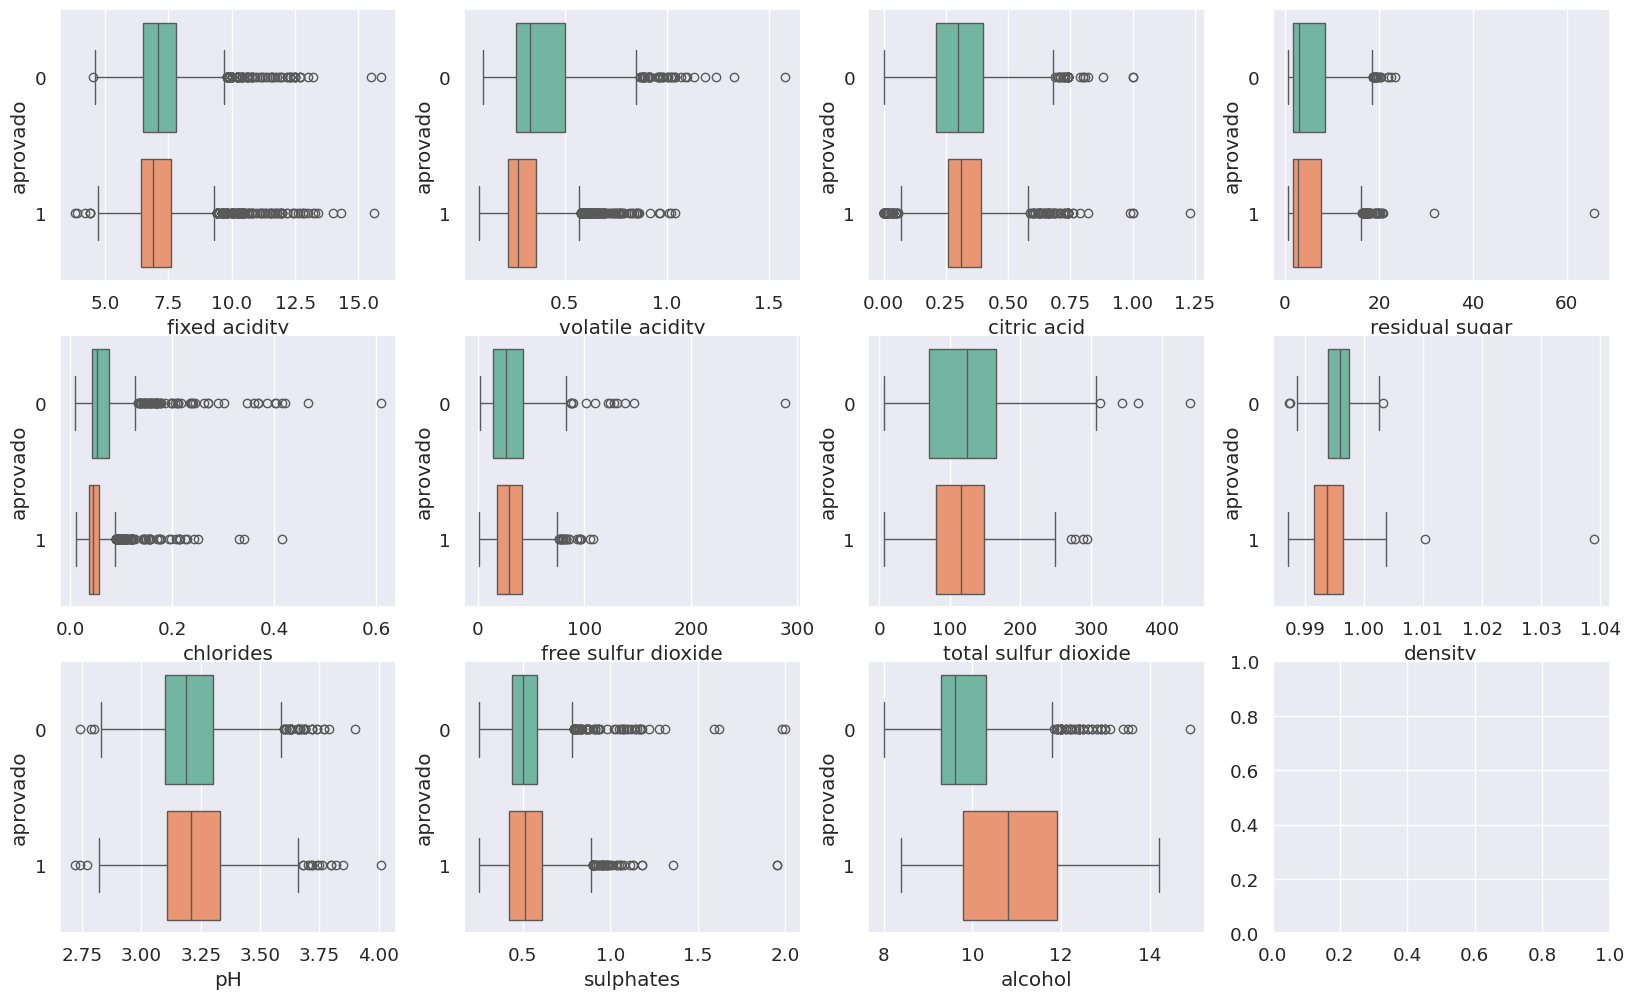

In [ ]:
sns.set(font_scale=1.2)
# Cria os 'espaços' para que possamos plotar os gráficos. Faremos um grid de 3 linhas por 4 colunas (o 3,4 na função)
fig, eixo = plt.subplots(3,4,figsize=(20,12)) # Criando uma figura e 12 eixos, em uma matriz de 3 linhas x 4 colunas
# Para cada linha
for linha in range(3):
    # Para cada coluna
    for coluna in range(4):
        # Verifica se existe um nome de coluna na lista 'colunas_numericas'
        if colunas_numericas[linha][coluna] != '':
            # Se sim faz o plot do Boxplot naquela linha e coluna, indicando no eixo vertical/y sempre a variável 'aprovado'
            sns.boxplot(data=dados_treino,x=colunas_numericas[linha][coluna],y='aprovado',ax=eixo[linha][coluna],orient='h',palette='Set2')

## Preprocessamento dos dados

Como vimos inicialmente, temos alguns registros faltantes na nossa base. Temos recursos para tratá-los?

### Tratamento de missings

O primeiro caminho para tratar missings é entender se temos de fato, e qual é o tamanho do problema na nossa base! <p>
Um bom caminho para isso é usar o método `.isna()` do Pandas

In [ ]:
dados_treino.isna()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,aprovado
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3815,False,False,False,False,False,False,False,False,False,False,False,False,False
3816,False,False,False,False,False,False,False,False,False,False,False,False,False
3817,False,False,False,False,False,False,False,False,False,False,False,False,False
3818,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dados_teste.isna().mean()

type                    0.0
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
aprovado                0.0
dtype: float64

In [ ]:
dados_treino.isna().mean()*100 #Multiplicando por 100 para transformar em percentual

type                    0.000000
fixed acidity           0.209424
volatile acidity        0.130890
citric acid             0.078534
residual sugar          0.026178
chlorides               0.052356
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.183246
sulphates               0.104712
alcohol                 0.000000
aprovado                0.000000
dtype: float64

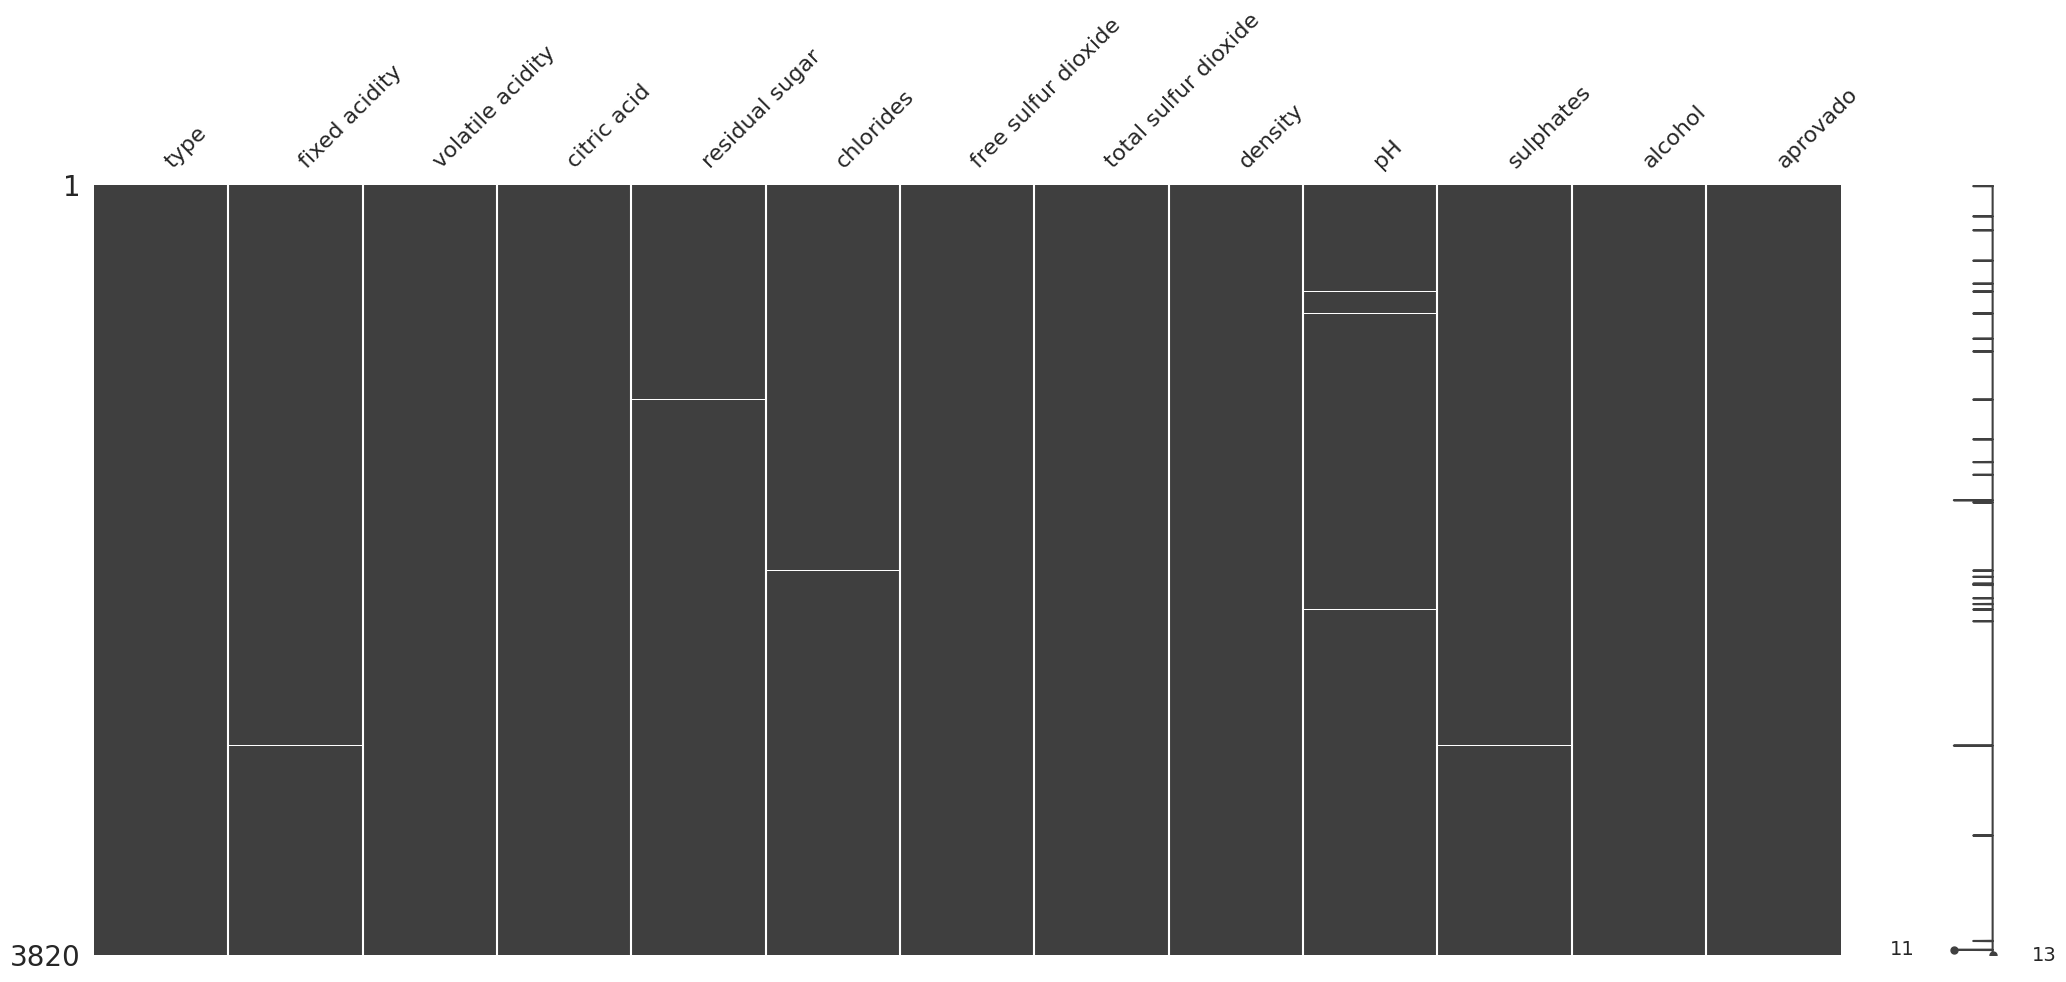

In [ ]:
import missingno as msno
msno.matrix(dados_treino)
plt.show()

Em situações como essa, onde os missings representam uma baixa proporção da base, podemos apenas **excluir os registros**. Podemos fazer isso usando o método `.dropna()` do Pandas


In [ ]:
dados_treino_mis = dados_treino.dropna()

# Testando para ver se excluiu mesmo
dados_treino_mis.isna().mean()*100

type                    0.0
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
aprovado                0.0
dtype: float64

In [ ]:
print("Antes")
print(len(dados_treino))
print("Depois")
print(len(dados_treino_mis))

Antes
3820
Depois
3793


In [ ]:
dados_treino = dados_treino.dropna()

## Usando análises para encontrar os vinhos aprovados

Agora que temos um bom repositório de técnicas, vamos usá-las para tentar encontrar os melhores vinhos!

### Mas como medir o sucesso?

Nosso objetivo é identificar os vinhos aprovados (marcação `1`). Conseguimos encontrar estes vinhos por regras simples das propriedades químicas?

Se calcularmos a `média`da coluna `aprovado`, veremos o percentual de vinhos da base que são aprovados

In [ ]:
# A média de uma coluna que possui '0's e '1's nos dará o percentual de '1's
dados_treino.aprovado.mean()

0.4945953071447403

Temos então **49,5%** dos vinhos aprovados. Vamos então descobrir como filtrar vinhos aprovados baseados nas outras propriedades

### O `groupby` como seleção

Para podermos avaliar a base de forma agrupada, podemos usar o método `.groupby()` do Pandas. A estrutura geral é:
* `dataframe.groupby(variavel_de_agrupamento)[variavel_de_interesse].agg('função_de_agrupamento')`

Vamos começar pelo tipo de vinho, que é uma variável categórica

In [ ]:
# Fazendo apenas o groupby, o que o Python retorna é um agrupamento
dados_treino.groupby('type')

In [ ]:
dados_treino.groupby('type')['aprovado'].mean() # Média da coluna 'agrupado' pela variável 'type'

type
red      0.406439
white    0.525902
Name: aprovado, dtype: float64

### Mais agrupamentos - Criando faixas

Quando avaliamos variáveis contínuas, o `.groupby()` não pode ser diretamente usado; para isso, precisamos transformar a variável contínua em categórica para fazer essa avaliação.

Para este tipo de análise, podemos converter uma variável contínua em faixas usando outra função do pandas, o `.cut()`!

In [ ]:
# Separando uma variável contínua em faixas
coluna = 'chlorides'

# Criando uma nova coluna que é a faixa da coluna 'chlorides'

dados_treino[coluna+'_faixa'] = pd.cut(
    dados_treino[coluna], # Coluna de interesse
    bins=5 # Número de faixas
)


In [ ]:
# Executando o .groupby() da coluna criada
agrupamento = dados_treino.groupby('chlorides_faixa')['aprovado'].agg(['count','mean']) # agg de aggregation.
agrupamento

,count,mean
chlorides_faixa,,
"(0.0084, 0.129]",3693,0.500135
"(0.129, 0.249]",80,0.312500
"(0.249, 0.37]",12,0.250000
"(0.37, 0.49]",7,0.142857
"(0.49, 0.61]",1,0.000000


In [ ]:
# Renomeando colunas
agrupamento.columns = ['contagem','fração vinhos aprovados']
agrupamento

,contagem,fração vinhos aprovados
chlorides_faixa,,
"(0.0084, 0.129]",3693,0.500135
"(0.129, 0.249]",80,0.312500
"(0.249, 0.37]",12,0.250000
"(0.37, 0.49]",7,0.142857
"(0.49, 0.61]",1,0.000000


In [ ]:
# Replicando o raciocínio com outra coluna
coluna = 'alcohol'

# Criando uma nova coluna que é a faixa da coluna 'chlorides'

dados_treino[coluna+'_faixa'] = pd.cut(
    dados_treino[coluna], # Coluna de interesse
    bins=5 # Número de faixas
)

# Executando o .groupby() da coluna criada
agrupamento = dados_treino.groupby(coluna+'_faixa')['aprovado'].agg(['count','mean'])
# Renomeando colunas
agrupamento.columns = ['contagem','fração vinhos aprovados']
agrupamento

,contagem,fração vinhos aprovados
alcohol_faixa,,
"(7.993, 9.38]",747,0.305221
"(9.38, 10.76]",1759,0.378624
"(10.76, 12.14]",888,0.692568
"(12.14, 13.52]",382,0.921466
"(13.52, 14.9]",17,0.882353


### Automatizando o processo de seleção

Para automatizar o processo, podemos criar algumas regras de melhores faixas. Para temos uma quantidade interessante de vinhos, podemos escolher as seguintes regras para `cada coluna`:
* Faixas que tenham um **número mínimo de vinhos**
* Dentre as faixas acima, escolher aquela que tenha a **maior fração de vinhos aprovados**

Vamos então construir a lógica de seleção! Começando pela variável `chlorides`:

#### Passo 1 - Selecionar a variável e fazer a coluna de faixas

In [ ]:
coluna = 'chlorides'
minimo_vinhos = 50

# Passo 1 - Selecionar a variável e fazer a coluna de faixas
dados_treino[coluna+'_faixa'] = pd.cut(dados_treino[coluna],bins=5)
dados_treino.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,aprovado,chlorides_faixa,alcohol_faixa
0,white,6.7,0.41,0.27,2.6,0.033,25.0,85.0,0.99086,3.05,0.34,11.7,1,"(0.0084, 0.129]","(10.76, 12.14]"
1,white,8.6,0.23,0.46,1.0,0.054,9.0,72.0,0.99410,2.95,0.49,9.1,1,"(0.0084, 0.129]","(7.993, 9.38]"
2,white,6.6,0.32,0.26,4.6,0.031,26.0,120.0,0.99198,3.40,0.73,12.5,1,"(0.0084, 0.129]","(12.14, 13.52]"
3,red,8.2,0.33,0.32,2.8,0.067,4.0,12.0,0.99473,3.30,0.76,12.8,1,"(0.0084, 0.129]","(12.14, 13.52]"
4,white,6.9,0.28,0.24,2.1,0.034,49.0,121.0,0.98882,2.98,0.43,13.2,1,"(0.0084, 0.129]","(12.14, 13.52]"


#### Passo 2 - Agrupar pela coluna de faixas e calcular média da coluna 'aprovado', bem como a contagem

In [ ]:
# Passo 2 - Agrupar pela coluna de faixas e calcular média da coluna 'aprovado'
agrupamento = dados_treino.groupby(coluna+'_faixa')['aprovado'].agg(['count','mean'])
agrupamento.columns = ['contagem','fração vinhos aprovados']
agrupamento

,contagem,fração vinhos aprovados
chlorides_faixa,,
"(0.0084, 0.129]",3693,0.500135
"(0.129, 0.249]",80,0.312500
"(0.249, 0.37]",12,0.250000
"(0.37, 0.49]",7,0.142857
"(0.49, 0.61]",1,0.000000


#### Passo 3 - Selecionar apenas as faixas com um número mínimo de vinhos

In [ ]:
# Passo 3 - Selecionar apenas as faixas com um número mínimo de vinhos
agrupamento_filtro = agrupamento[agrupamento['contagem']>=minimo_vinhos]
agrupamento_filtro

,contagem,fração vinhos aprovados
chlorides_faixa,,
"(0.0084, 0.129]",3693,0.500135
"(0.129, 0.249]",80,0.312500


#### Passo 4 - Ordenar pela fração de vinhos aprovados, e selecionar a melhor faixa (índice 0)

In [ ]:
agrupamento_filtro.sort_values(by='fração vinhos aprovados',ascending=False)

,contagem,fração vinhos aprovados
chlorides_faixa,,
"(0.0084, 0.129]",3693,0.500135
"(0.129, 0.249]",80,0.312500


In [ ]:
# Passo 4 - Ordenar pela fração de vinhos aprovados, e selecionar a melhor faixa (índice 0)
faixa_final = agrupamento_filtro.sort_values(by='fração vinhos aprovados',ascending=False).iloc[0] # iloc[0] indica a 1a linha
faixa_final

contagem                   3693.000000
fração vinhos aprovados       0.500135
Name: (0.0084, 0.129], dtype: float64

#### Passo 5 - Transformar a seleção em um DataFrame para simplificar o resultado

In [ ]:
# Passo 5 - Transformar a seleção em um DataFrame para simplificar o resultado
faixa_final = faixa_final.to_frame().T # o 'to_frame' transforma em DataFrame, e o .T transpõe o DataFrame

# Imprimindo a coluna e a faixa
faixa_final

,contagem,fração vinhos aprovados
"(0.0084, 0.129]",3693.0,0.500135


Unindo agora todas as etapas!

In [ ]:
coluna = 'chlorides'
minimo_vinhos = 50

# Passo 1 - Selecionar a variável e fazer a coluna de faixas
dados_treino[coluna+'_faixa'] = pd.cut(dados_treino[coluna],bins=5)

# Passo 2 - Agrupar pela coluna de faixas e calcular média da coluna 'aprovado'
agrupamento = dados_treino.groupby(coluna+'_faixa')['aprovado'].agg(['count','mean'])
agrupamento.columns = ['contagem','fração vinhos aprovados']

# Passo 3 - Selecionar apenas as faixas com um número mínimo de vinhos
agrupamento_filtro = agrupamento[agrupamento['contagem']>=minimo_vinhos]

# Passo 4 - Ordenar pela fração de vinhos aprovados, e selecionar a melhor faixa (índice 0)
faixa_final = agrupamento_filtro.sort_values(by='fração vinhos aprovados',ascending=False).iloc[0]

# Passo 5 - Transformar a seleção em um DataFrame para simplificar o resultado
faixa_final = faixa_final.to_frame().T # o 'to_frame' transforma em DataFrame, e o .T transpõe o DataFrame

# Imprimindo a coluna e a faixa
faixa_final

,contagem,fração vinhos aprovados
"(0.0084, 0.129]",3693.0,0.500135


Para melhorar ainda mais a disposição, podemos tirar a faixa do índice e no lugar dela **colocar o nome da coluna analisada**

In [ ]:
# Reinicializando o índice
faixa_final = faixa_final.reset_index() # Para transformar a faixa em uma coluna separada, que chamararemos de 'melhor faixa'
# Renomeando colunas
faixa_final.columns = ['melhor faixa','contagem','fração vinhos aprovados']
# Criando uma nova coluna que terá o nome da variável analisada
faixa_final['coluna'] = coluna
# Colocando esta coluna coim o nome da variável como índice
faixa_final.set_index('coluna',inplace=True)

faixa_final

,melhor faixa,contagem,fração vinhos aprovados
coluna,,,
chlorides,"(0.0084, 0.129]",3693.0,0.500135


In [ ]:
def seleciona_faixa(dados, coluna, min_vinhos=100, faixas=10):
    # Função que parte dos dados e da coluna, selecionando a melhor faixa dentre as faixas escolhidas
    # Passo 1 - Selecionar a variável e fazer a coluna de faixas
    dados_treino[coluna+'_faixa'] = pd.cut(dados_treino[coluna],bins=faixas)
    # Passo 2 - Agrupar pela coluna de faixas e calcular média da coluna 'aprovado'
    agrupamento = dados_treino.groupby(coluna+'_faixa')['aprovado'].agg(['count','mean'])
    agrupamento.columns = ['contagem','fração vinhos aprovados']
    # Passo 3 - Selecionar apenas as faixas com um número mínimo de vinhos
    agrupamento_filtro = agrupamento[agrupamento['contagem']>=min_vinhos]
    # Passo 4 - Ordenar pela fração de vinhos aprovados, e selecionar a melhor faixa
    faixa_final = agrupamento_filtro.sort_values(by='fração vinhos aprovados',ascending=False).reset_index().iloc[0].to_frame().T
    # Ajustando nomes
    faixa_final.columns = ['faixa','contagem','fração vinhos aprovados']
    # Criando uma nova coluna com o nome da variável testada, e colocando-a como índice
    faixa_final['coluna'] = coluna
    faixa_final.set_index('coluna',inplace=True)
    # Salvando as seleções em um dataframe
    return faixa_final
    # Não vamos retornar nada nessa função

In [ ]:
# Rodando para a primeira coluna
teste_faixas = seleciona_faixa(dados_treino,'chlorides')

Vamos agora usando uma estrutura de **repetição (`for`) fazer a escolha para as demais colunas!**

In [ ]:
# Novamente selecionando as colunas numéricas
colunas_numericas = list(dados_treino.select_dtypes(include='float').columns)

# Rodando a função para todas as colunas (excluindo a 'chlorides', que já fizemos)
for col in colunas_numericas[1:]:
    teste_faixas = pd.concat([teste_faixas,seleciona_faixa(dados_treino,col)]) # Concatenar os Dataframes dentro da lista
teste_faixas

,faixa,contagem,fração vinhos aprovados
coluna,,,
chlorides,"(0.0084, 0.0691]",2872,0.54039
volatile acidity,"(0.0785, 0.23]",796,0.689698
citric acid,"(0.246, 0.369]",1567,0.60434
residual sugar,"(0.535, 7.12]",2662,0.512021
chlorides,"(0.0084, 0.0691]",2872,0.54039
free sulfur dioxide,"(29.8, 58.6]",1494,0.554886
total sulfur dioxide,"(92.8, 136.2]",1153,0.596704
density,"(0.987, 0.992]",816,0.773284
pH,"(3.365, 3.494]",446,0.542601


### Foi bastante trabalhoso! Mas afinal, qual é o melhor filtro de vinhos de qualidade?

Agora que temos as melhores faixas de seleção por variáveis, podemos escolher aquela que nos dê a `maior fração de vinhos aprovados`!

Para fazer isso, podemos ordenar nosso Dataframe usando o método `.sort_values()`:

In [ ]:
# Ordenando pela melhor fração de aprovação
teste_faixas.sort_values(by='fração vinhos aprovados',ascending=False) #Ascending=False indica ordenação decrescente

,faixa,contagem,fração vinhos aprovados
coluna,,,
alcohol,"(12.14, 12.83]",286,0.926573
density,"(0.987, 0.992]",816,0.773284
sulphates,"(0.775, 0.95]",168,0.696429
volatile acidity,"(0.0785, 0.23]",796,0.689698
citric acid,"(0.246, 0.369]",1567,0.60434
total sulfur dioxide,"(92.8, 136.2]",1153,0.596704
free sulfur dioxide,"(29.8, 58.6]",1494,0.554886
pH,"(3.365, 3.494]",446,0.542601
chlorides,"(0.0084, 0.0691]",2872,0.54039


<center> <img src="https://media1.tenor.com/m/ssV1R0MCQJgAAAAC/parks-and-rec-aubrey-plaza.gif" width=1300>




## Avaliando com a base de teste

In [ ]:
# Lembrando as faixas de corte
teste_faixas.loc['alcohol']

faixa                      (12.14, 12.83]
contagem                              286
fração vinhos aprovados          0.926573
Name: alcohol, dtype: object

In [ ]:
# Fazendo o mesmo corte na base de teste
filtro_teste = dados_teste[dados_teste.alcohol.between(12.14,12.83)]

# Média de vinhos aprovados
print("Média de vinhos aprovados com este filtro:")
print(filtro_teste.aprovado.mean())

Média de vinhos aprovados com este filtro:
0.9402985074626866


### <center> Mais de **94% de vinhos aprovados!!!**



<center> <img src = "https://media.tenor.com/JxLHV9U4RLMAAAAM/fierce-vinho-saude.gif" width=800>

### Conseguimos cumprir o objetivo, que era o de descobrir os melhores vinhos por propriedades químicas!
    
